In [12]:
from google.colab import files
uploaded = files.upload()

Saving modified_student_data (1).csv to modified_student_data (1) (1).csv


In [13]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('modified_student_data (1).csv')



# Display the distinct target classes
target_classes = df['GradeClass'].unique()
print("Distinct target classes:", target_classes)


df.head()

Distinct target classes: [2. 1. 4. 3. 0.]


,StudyTimeWeekly,GPA,GradeClass
0,0.992773,0.732299,2.0
1,0.771270,0.760729,1.0
2,0.210718,0.028151,4.0
3,0.501965,0.513555,3.0
4,0.233840,0.322015,4.0


###Code with comments included for each part

Epoch 0 | Loss: 15.0658 | Accuracy: 0.1323
Epoch 1000 | Loss: 1.2513 | Accuracy: 0.4950
Epoch 2000 | Loss: 1.2392 | Accuracy: 0.4339
Epoch 3000 | Loss: 1.2368 | Accuracy: 0.4381
Epoch 4000 | Loss: 1.2352 | Accuracy: 0.4375
Epoch 5000 | Loss: 1.2342 | Accuracy: 0.4428
Epoch 6000 | Loss: 1.2335 | Accuracy: 0.4370
Epoch 7000 | Loss: 1.2331 | Accuracy: 0.4365
Epoch 8000 | Loss: 1.2326 | Accuracy: 0.4375
Epoch 9000 | Loss: 1.2323 | Accuracy: 0.4370

Performance on Test Set:
Accuracy: 0.4342
Precision (per class): [0.         0.14906832 0.28971963 0.         0.72511848]
Recall (per class): [0.         0.48979592 0.36470588 0.         0.64556962]
F1-Score (per class): [0.         0.22857143 0.32291667 0.         0.68303571]


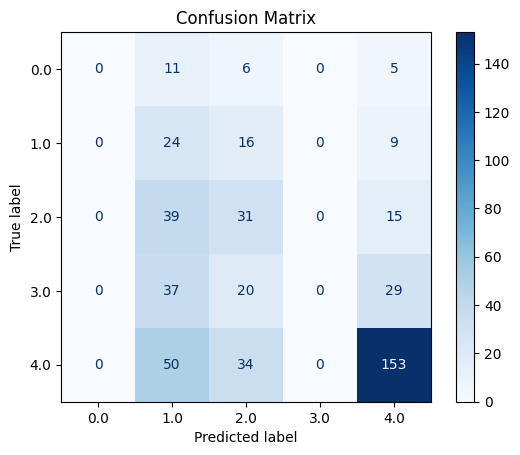

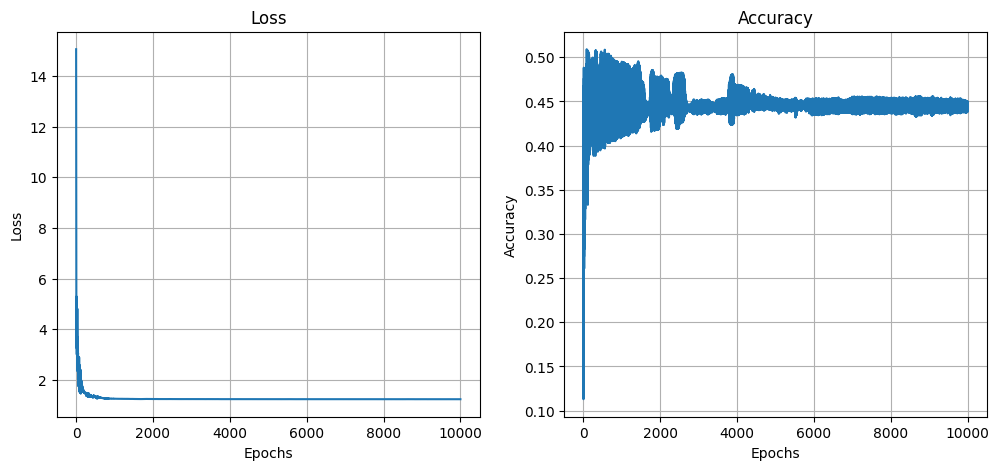

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('modified_student_data (1).csv')  # Load CSV data into a pandas DataFrame

# Extract features and labels
features = data[['StudyTimeWeekly', 'GPA']].values  # Extract the feature columns (StudyTimeWeekly, GPA)
labels = data['GradeClass'].values  # Extract the target column (GradeClass)

# Label encoding for target variable
encoder = LabelEncoder()  # Initialize the label encoder to convert categorical labels into integers
labels_encoded = encoder.fit_transform(labels)  # Transform the class labels into integer values
num_classes = len(np.unique(labels_encoded))  # Number of distinct classes (unique labels in the dataset)
labels_onehot = np.eye(num_classes)[labels_encoded]  # One-hot encode the labels (convert to binary matrix)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.2, random_state=42)
# This function randomly splits the dataset into training and testing sets (80% training, 20% testing)

# Neural network initialization
np.random.seed(0)  # Set random seed for reproducibility

# Define the custom neural network class
class CustomNeuralNet:
    def __init__(self, in_dim, h1_dim, h2_dim, h3_dim, out_dim):
        # Initialize the neural network with input size (in_dim), hidden layer sizes (h1, h2, h3), and output size (out_dim)
        self.lr = 0.01  # Learning rate for gradient descent
        # Initialize weights for the layers (using random values)
        self.W1 = np.random.randn(in_dim, h1_dim)  # Weights between input and first hidden layer
        self.W2 = np.random.randn(h1_dim, h2_dim)  # Weights between first and second hidden layers
        self.W3 = np.random.randn(h2_dim, h3_dim)  # Weights between second and third hidden layers
        self.W4 = np.random.randn(h3_dim, out_dim)  # Weights between third hidden layer and output layer (5 neurons for 5 classes)

    # ReLU activation function (Rectified Linear Unit)
    def relu(self, x):
        return np.maximum(0, x)  # Returns max(0, x), thresholding at zero

    # Derivative of ReLU (used for backpropagation)
    def relu_grad(self, x):
        return (x > 0).astype(float)  # Gradient is 1 if x > 0, else 0

    # Softmax function for multi-class classification (used in the output layer)
    def softmax(self, x):
        shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for numerical stability
        exp_scores = np.exp(shift_x)  # Exponentiate to get positive values
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Normalize the outputs to sum to 1 (probabilities)

    # Forward pass through the network (calculates outputs for given inputs)
    def forward(self, X):
        self.L1 = self.relu(X @ self.W1)  # First hidden layer: input to first hidden layer (X * W1) followed by ReLU
        self.L2 = self.relu(self.L1 @ self.W2)  # Second hidden layer: L1 to L2
        self.L3 = self.relu(self.L2 @ self.W3)  # Third hidden layer: L2 to L3
        self.output = self.softmax(self.L3 @ self.W4)  # Output layer: L3 to output, using softmax for multi-class
        return self.output  # Return the output probabilities for each class

    # Backward pass (gradient calculation and weights update via backpropagation)
    def backward(self, X, Y):
        m = Y.shape[0]  # Number of training samples
        grad_output = self.output - Y  # Error at the output layer (difference between predicted and true values)

        # Calculate gradients for all weights using backpropagation
        dW4 = self.L3.T @ grad_output / m  # Gradient for output weights (L3 to W4)
        dL3 = (grad_output @ self.W4.T) * self.relu_grad(self.L3)  # Error propagated to L3

        dW3 = self.L2.T @ dL3 / m  # Gradient for second hidden layer weights (L2 to W3)
        dL2 = (dL3 @ self.W3.T) * self.relu_grad(self.L2)  # Error propagated to L2

        dW2 = self.L1.T @ dL2 / m  # Gradient for first hidden layer weights (L1 to W2)
        dL1 = (dL2 @ self.W2.T) * self.relu_grad(self.L1)  # Error propagated to L1

        dW1 = X.T @ dL1 / m  # Gradient for input layer weights (X to W1)

        # Update weights using gradients and learning rate (gradient descent)
        self.W4 -= self.lr * dW4  # Update output layer weights
        self.W3 -= self.lr * dW3  # Update third hidden layer weights
        self.W2 -= self.lr * dW2  # Update second hidden layer weights
        self.W1 -= self.lr * dW1  # Update first hidden layer weights

    # Train the model for one epoch (forward pass + backward pass)
    def train(self, X, Y):
        self.forward(X)  # Perform forward pass
        self.backward(X, Y)  # Perform backward pass (update weights)

    # Prediction function (classifies new data)
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)  # Return the class with highest probability

# Neural network dimensions
input_size = X_train.shape[1]  # 2 features: StudyTimeWeekly and GPA
hidden1 = 64  # Number of neurons in the first hidden layer
hidden2 = 32  # Number of neurons in the second hidden layer
hidden3 = 16  # Number of neurons in the third hidden layer
output_size = num_classes  # 5 neurons in the output layer for 5 classes (multi-class classification)

# Initialize the model
model = CustomNeuralNet(input_size, hidden1, hidden2, hidden3, output_size)

# Lists to store loss and accuracy for each epoch (for plotting)
loss_history = []
accuracy_history = []

# Training loop
for epoch in range(10000):
    model.train(X_train, y_train)  # Train the model for one epoch

    # Forward pass for training data
    probs = model.forward(X_train)
    predictions = np.argmax(probs, axis=1)  # Get the class with the highest probability
    actual = np.argmax(y_train, axis=1)  # Get the true class labels

    # Calculate loss (cross-entropy loss function)
    loss = -np.mean(np.sum(y_train * np.log(probs + 1e-8), axis=1))  # Cross-entropy loss
    acc = np.mean(predictions == actual)  # Calculate accuracy

    loss_history.append(loss)  # Store loss for plotting
    accuracy_history.append(acc)  # Store accuracy for plotting

    # Print loss and accuracy every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

# Testing the model on the test set
probs_test = model.forward(X_test)  # Get output probabilities for test data
predictions_test = np.argmax(probs_test, axis=1)  # Get predicted classes for test data
actual_test = np.argmax(y_test, axis=1)  # Get true classes for test data

# Calculate performance metrics
accuracy = accuracy_score(actual_test, predictions_test)  # Accuracy
precision, recall, f1, _ = precision_recall_fscore_support(actual_test, predictions_test, average=None, zero_division=0)  # Precision, Recall, F1

# Print performance metrics
print("\nPerformance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (per class): {precision}")
print(f"Recall (per class): {recall}")
print(f"F1-Score (per class): {f1}")

# Confusion Matrix
cm = confusion_matrix(actual_test, predictions_test)  # Compute confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)  # Display confusion matrix
cm_display.plot(cmap='Blues')  # Plot confusion matrix
plt.title("Confusion Matrix")
plt.show()

# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid(True)

plt.show()


# **Documentation:**
**Key Changes Between the Original Code and the Updated Code:**
1. The dataset is more complex, using real-world data with features StudyTimeWeekly and GPA, and the target variable GradeClass. The dataset contains more than 4 samples, and GradeClass is a multi-class target (with 5 distinct classes).
2. The model has a more advanced structure with three hidden layers (64, 32, 16 neurons) and a multi-class output layer with 5 neurons (one per class). The output layer uses the softmax activation function to handle multi-class classification.
3. The hidden layers still use ReLU activation, but the output layer uses softmax, which is more suitable for multi-class classification because it normalizes the outputs to a probability distribution.
4.  The training involves the backpropagation algorithm with the cross-entropy loss function for multi-class classification. The model also includes training on both the training and testing datasets, along with additional evaluation metrics such as precision, recall, and F1-score.
5. The loss function is cross-entropy, which is designed for classification tasks and multi-class classification problems.
6. The performance is evaluated using a variety of metrics, including accuracy, precision, recall, and F1-score, and the model's predictions are analyzed using a confusion matrix.
7.  The dataset is split into training and testing sets using train_test_split, allowing the model to be tested on unseen data.
8. In addition to the error plot, the confusion matrix is displayed to provide a better understanding of the model's classification performance, and training progress is also visualized through accuracy and loss curves.

# **Results and Analysis:**

**The performance of the neural network is as follows:**

**Loss and Accuracy Over Training Epochs:**

The model starts with a high loss and low accuracy (Epoch 0 | Loss: 15.0658 | Accuracy: 0.1323), which is expected at the beginning of training.
Over the epochs, the loss decreases and stabilizes, and accuracy improves slightly, reaching around 43% after 10,000 epochs (Epoch 9000 | Loss: 1.2323 | Accuracy: 0.4370).

While there is a decrease in loss, the accuracy improvement is slow, suggesting that the model is struggling to improve after a certain point.

***Test Set Performance: ***

The model achieves an accuracy of 43.42% on the test set, which is relatively low for a multi-class classification task.
Precision, Recall, and F1-Score:

Class 0:
Precision, Recall, and F1-Score are 0, meaning the model is not predicting any instances for this class.
This suggests that the model might be underfitting for this class or is unable to capture the patterns of this class due to data imbalance or other factors.

Class 1:
Precision: 0.149 (very low), Recall: 0.49 (relatively higher), F1-Score: 0.23.
The model is not precise in predicting Class 1 (low precision), but it can identify some instances of Class 1 (relatively decent recall). The low F1-score indicates that the model's ability to predict Class 1 is not reliable.

Class 2:
Precision: 0.29, Recall: 0.365, F1-Score: 0.32.
The model performs better on Class 2 compared to Class 1, though precision and recall are still far from ideal. A moderate F1-score shows that the model can identify this class somewhat reliably, but there is still room for improvement.

Class 3:
Precision, Recall, and F1-Score are 0, indicating that the model does not predict Class 3 at all. This could be due to issues with class imbalance or insufficient representation of this class during training.

Class 4:
Precision: 0.725, Recall: 0.646, F1-Score: 0.683.
Class 4 shows the best performance, with high precision and recall. The model is very good at predicting this class, with a strong F1-score, meaning the model is more reliable for this class than others.

###I ran the model a couple of times after I inserted these values so they are subject to change.

# **Conclusion:**

Key Findings: The model is struggling with class imbalance and underfitting. While it performs well on Class 4, it is not effective for other classes, especially Class 0 and Class 3.

Challenges: The primary challenge is class imbalance, which is limiting the model's ability to generalize to all classes.

Next Steps: The model can be improved by tuning hyperparameters, addressing class imbalance, and exploring more complex network architectures. Further experiments with different configurations, it could lead to better performance.